In [1]:
#when running from HDT: uncomment this
import sys, os
path_dir = os.getcwd()
sys.path.append(path_dir+"/Functions")

In [2]:
from general_functions import * 
from muscle_functions import * 
#from integrator_functions import * 
#from matrices_functions import * #can make specific later if bloated
from constants_functions import * 
from plot_functions import *
from save_functions import *

Text(0.5, 1.0, 'The forced muscle lengthenings & contraction')

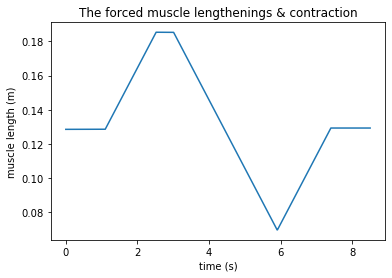

In [3]:
#must include 'longmuscle' for long muscle parameters, and 'shortmuscle' for short muscle parameters
experiment_name = 'full_curve_shortmuscle'#'zoomed'

#model type determines whether Huxley or Hill functions are used, v_type determines the used vce equation in the Huxley model (old is used) and FL_.. determines the used FL model (hill is used)
model_type,v_type,FL_type='huxley','v_old','FL_hill' #'huxley','hill'---'v_old','v_new'---'FL_0','FL_hill','FL_huxley'
FV_type='FV_hill'
hill_type = 'thijs'         #determines the hill model used. 'thijs' for hill_expanded, 'stroeve' for hill_simple
a_func=True                 #use an activation function


#The stiffness region that the muscles start in must be in the specific_save_name. Names are:
#mostpos,verypos,newpos,newneg,mostneg for stiffness region 1-5. Region name must be preceded by stiff_start_
specific_save_name='stiff_start_newpos'#'stiff_start_neg','stiff_start_med','stiff_start_pos', depending on in which region it starts
saveornot=True              #If true, the experiment data will be saved to a dataset in /Results/data

save_name = 'shortcurve_'   #determines the save name


#some experiment parameters 
fs=2500                     #steps/second
muscle_number = 1           #nr of muscles used
tot_bridge_nr = 3000        #number of cross-bridges in the Huxley Model
l_mtc0 = 0.1285496          #muscle length
Fmax_muscles = 1            #determines the fmax constant for the huxley model
Fmax_muscles_actual = 1     #determines the fmax constant for the hill model
mus_vals = muscle_vals_func()
h_step = 1/fs               #stepsize         (s)
t0 = 0.0                    #time start point (s)
tf = 8.5                    #time end point   (s)
step_nr = int(fs*(tf-t0))   #total steps




    
if 'zoomed' in experiment_name:
    velocity = 2*mus_vals[0][8]
    t0 = 0.0      #time start point (s)
    tf = 6.0       #time end point   (s)
    t1_start = 0.01#start velocity input
    t1_end = 0.05#end   velocity input
    t2_start = 0.21#start velocity input
    t2_end = 0.25#end   velocity input
    t3_start = 0.41#start velocity input
    t3_end = 0.45#end   velocity input

    t4_start = 1.21#start velocity input
    t4_end = 1.25#end   velocity input
    t5_start = 1.41#start velocity input
    t5_end = 1.45#end   velocity input

    t6_start = 2.21#start velocity input
    t6_end = 2.25#end   velocity input
    t7_start = 2.41#start velocity input
    t7_end = 2.45#end   velocity input
    t8_start = 2.61#start velocity input
    t8_end = 2.65#end   velocity input

    t9_start = 3.21#start velocity input
    t9_end = 3.25#end   velocity input
    t10_start = 3.41#start velocity input
    t10_end = 3.45#end   velocity input
    t11_start = 3.61#start velocity input
    t11_end = 3.65#end   velocity input
    t12_start = 3.81#start velocity input
    t12_end = 3.85#end   velocity input

    t13_start = 4.21#start velocity input
    t13_end = 4.25#end   velocity input
    t14_start = 4.41#start velocity input
    t14_end = 4.45#end   velocity input
    t15_start = 4.61#start velocity input
    t15_end = 4.65#end   velocity input
    t16_start = 4.81#start velocity input
    t16_end = 4.85#end   velocity input

    t17_start = 5.21#start velocity input
    t17_end = 5.25#end   velocity input
    t18_start = 5.41#start velocity input
    t18_end = 5.45#end   velocity input
    t19_start = 5.61#start velocity input
    t19_end = 5.65#end   velocity input
    t20_start = 5.81#start velocity input
    t20_end = 5.85#end   velocity input
    


    v_mtc = np.zeros((step_nr+1))
    v_mtc[int(t1_start*fs+1):int(t1_end*fs)]=velocity
    v_mtc[int(t2_start*fs+1):int(t2_end*fs)]=velocity
    v_mtc[int(t3_start*fs+1):int(t3_end*fs)]=velocity
    v_mtc[int(t4_start*fs+1):int(t4_end*fs)]=velocity
    v_mtc[int(t5_start*fs+1):int(t5_end*fs)]=velocity
    v_mtc[int(t6_start*fs+1):int(t6_end*fs)]=velocity
    v_mtc[int(t7_start*fs+1):int(t7_end*fs)]=velocity
    v_mtc[int(t8_start*fs+1):int(t8_end*fs)]=velocity
    v_mtc[int(t9_start*fs+1):int(t9_end*fs)]=velocity
    v_mtc[int(t10_start*fs+1):int(t10_end*fs)]=velocity
    v_mtc[int(t11_start*fs+1):int(t11_end*fs)]=velocity
    v_mtc[int(t12_start*fs+1):int(t12_end*fs)]=velocity
    v_mtc[int(t13_start*fs+1):int(t13_end*fs)]=velocity
    v_mtc[int(t14_start*fs+1):int(t14_end*fs)]=velocity
    v_mtc[int(t15_start*fs+1):int(t15_end*fs)]=velocity
    v_mtc[int(t16_start*fs+1):int(t16_end*fs)]=velocity
    v_mtc[int(t17_start*fs+1):int(t17_end*fs)]=velocity
    v_mtc[int(t18_start*fs+1):int(t18_end*fs)]=velocity
    v_mtc[int(t19_start*fs+1):int(t19_end*fs)]=velocity
    v_mtc[int(t20_start*fs+1):int(t20_end*fs)]=velocity
if 'full_curve' in experiment_name:
    t0 = 0.0      #time start point (s)
    #tf = 3#7       #time end point   (s)
    '''
    v_mtc = np.zeros((step_nr+1))
    t1_start = 0.1#start velocity input
    t1_end = 1.5 #end   velocity input
    velocity =0.35*mus_vals[0][8]
    v_mtc[int(t1_start*fs+1):int(t1_end*fs)]=-velocity#add negative stretch at low velocity
    t2_start = 2.01#start velocity input
    t2_end = 5.0 #end   velocity input
    v_mtc[int(t2_start*fs+1):int(t2_end*fs)]=velocity
    t3_start = 6.01#start velocity input
    t3_end = 6.15 #end   velocity input
    v_mtc[int(t3_start*fs+1):int(t3_end*fs)]=velocity
    '''
    v_mtc = np.zeros((step_nr+1))
    t1_start = 1.1#start velocity input
    t1_end = 2.52 #end   velocity input
    velocity =0.4*mus_vals[0][8]#0.35*mus_vals[0][8]
    v_mtc[int(t1_start*fs+1):int(t1_end*fs)]=velocity#add negative stretch at low velocity
    # t2_start = 2.31#2.01#start velocity input
    # t2_end = 2.45#2.15 #end   velocity input
    # v_mtc[int(t2_start*fs+1):int(t2_end*fs)]=velocity*1
    #t?_mtc[int(t25_start*fs+1):int(t25_end*fs)]=velocity*1
    t3_start = 3.01#start velocity input
    t3_end = 5.90 #end   velocity input
    v_mtc[int(t3_start*fs+1):int(t3_end*fs)]=-velocity
    t4_start = 5.91#start velocity input
    t4_end = 7.40 #end   velocity input
    v_mtc[int(t4_start*fs+1):int(t4_end*fs)]=velocity
time_vector=np.linspace(t0,tf,step_nr+1)    
l_mtc = l_mtc0*np.ones(step_nr+1)+h_step*np.cumsum(v_mtc)

K_SE= np.zeros(step_nr+1)
K_CE= np.zeros(step_nr+1)
plt.plot(time_vector,l_mtc)
plt.ylabel('muscle length (m)')
plt.xlabel('time (s)')
plt.title('The forced muscle lengthenings & contraction')

0.02322672


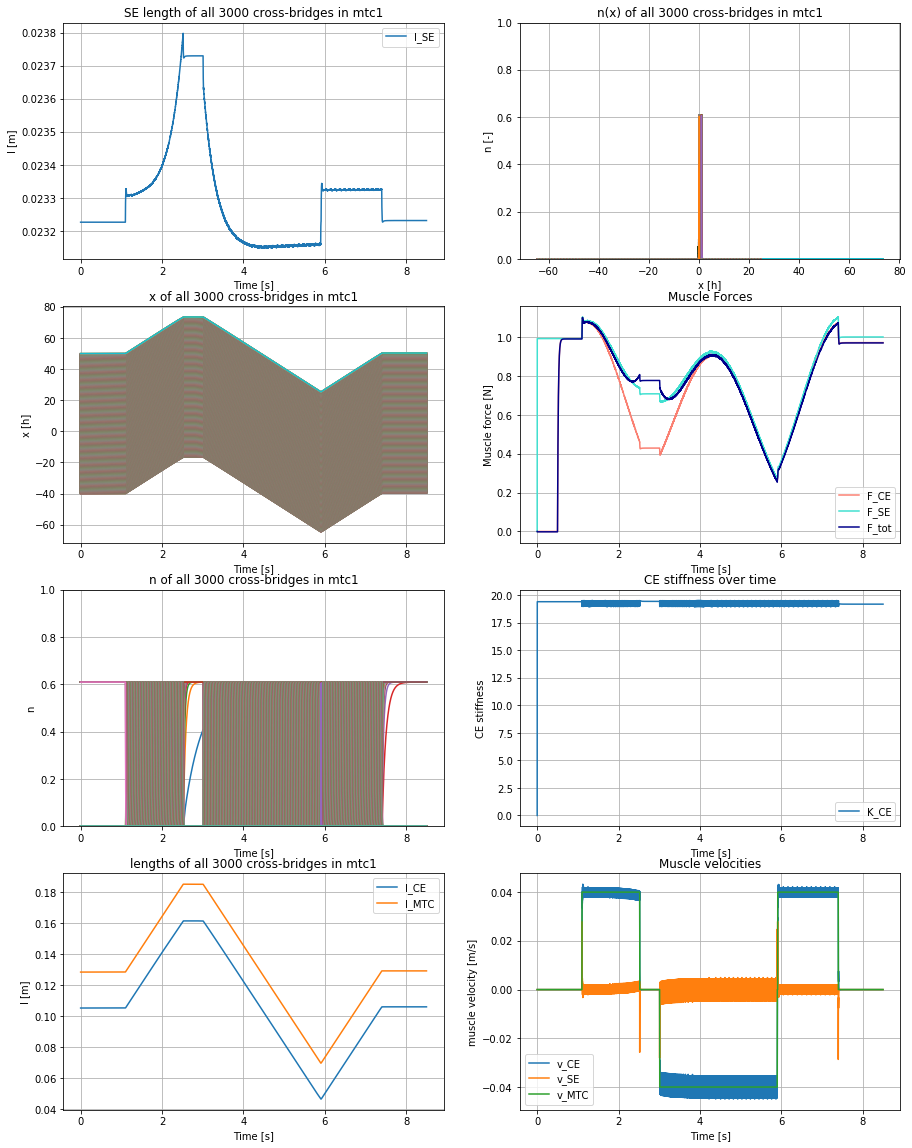

<xarray.Dataset>
Dimensions:  (time: 21251)
Coordinates:
  * time     (time) float64 0.0 0.0004 0.0008 0.0012 ... 8.499 8.499 8.5 8.5
Data variables:
    Fce_mtc  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9737 0.9737 0.9737 0.9737
    Fse_mtc  (time) float64 0.0 0.9944 0.9944 0.9944 ... 1.003 1.003 1.003 1.003
    F_mtc    (time) float64 0.0 -0.001869 -0.001869 ... 0.9721 0.9721 0.9721
    v_mtc    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    l_mtc    (time) float64 0.1285 0.1285 0.1285 0.1285 ... 0.1293 0.1293 0.1293
    STIM     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0 1.0
    lCE      (time) float64 0.1053 0.1053 0.1053 0.1053 ... 0.1061 0.1061 0.1061
    lSE      (time) float64 0.02323 0.02323 0.02323 ... 0.02323 0.02323 0.02323
    KSE      (time) float64 1.302e+03 1.302e+03 ... 1.302e+03 1.302e+03
Attributes:
    description:  States over time
<xarray.Dataset>
Dimensions:  (time: 21251)
Coordinates:
  * time     (time) float64 0.0 0.

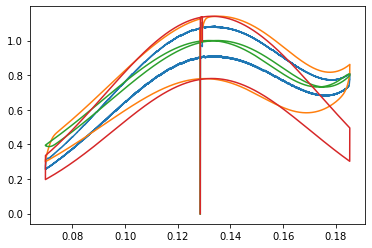

In [4]:
%%time
framemax_variable=-1#500
for ii in range(4):
    a=0

    if model_type=='huxley':
        states_hux = np.zeros((step_nr+1,tot_bridge_nr*2+2))
        #mus_vals_hux=mus_vals[0]
        mus_vals_hux = muscle_vals_func()
        mus_vals_changed,states_hux = constant_altering_function(mus_vals_hux[0],l_mtc0,states_hux,muscle_number,tot_bridge_nr,model_type,hill_type,Fmax_muscles_actual,experiment_name,specific_save_name)
        
        STIM = np.ones(len(time_vector))
        STIM[0:int(0.5*fs)]=0
        stimhux = STIM
        ti = t0
        calculated_muscle_forces = np.zeros((step_nr+1,3))
        while a < step_nr:
                t_counter = ti
                ti += h_step

                states_previous_step = states_hux[a]
                states_previous_step2 = states_hux[a-1]
                calculated_muscle_forces_previous_step = calculated_muscle_forces[a]
                F_per_step, state_current_step,K_SE_single,K_CE_single = huxley(l_mtc[a],v_mtc[a],states_previous_step,t_counter,h_step,mus_vals_changed,tot_bridge_nr,STIM[a],False,True,FL_type,v_type,states_previous_step2,calculated_muscle_forces_previous_step)#calculates the muscle force per muscle per cross-bridge for the current length and velocity values 
                a += 1
                states_hux[a] = state_current_step
                calculated_muscle_forces[a] = F_per_step
                K_SE[a] = K_SE_single
                K_CE[a] = K_CE_single
        lCE = states_hux[:,-2] 
        lSE = l_mtc - lCE      
        vCE = np.gradient(lCE,h_step)      
        vSE = np.gradient(lSE,h_step)     
        vCEhux = vCE
    if model_type=='hill':
        states2 = np.zeros((step_nr+1,2))
        mus_vals_hill = muscle_vals_func()
        mus_vals_changed2,states2 = constant_altering_function(mus_vals_hill[0],l_mtc0,states2,muscle_number,tot_bridge_nr,model_type,hill_type,Fmax_muscles,experiment_name,specific_save_name)
        #print(mus_vals_changed2)
        ti = t0
        STIM = np.ones(len(time_vector))
        STIM[0:int(0.5*fs)]=0
        force_vector = np.zeros((step_nr+1,9))
        force_vector[0][6],force_vector[0][4]=1,0.2#FLFV
        force_vector[0][2]=1/8*mus_vals_changed2[7]
        force_vector[0][1]=1/4*mus_vals_changed2[7]
        calculated_hill_forces = np.zeros((step_nr+1))
        while a < step_nr:
                t_counter = ti
                ti += h_step
                
                force_vector_previous_step = force_vector[a]    
                states_previous_step = states2[a]
                #force_vector_previous_stepl_mtc,v_mtc,states_previous_step,force_vector_previous_step,t_counter,h_step, mus_vals,STIM,FV_type='FV_hill',activation_function=True
                F_hill, new_states = hill(l_mtc[a],v_mtc[a],states_previous_step,force_vector_previous_step,t_counter,h_step, mus_vals_changed2,STIM[a],hill_type,FV_type,a_func)#calculates the muscle force per muscle per cross-bridge for the current length and velocity values 
                a += 1
                #F_hill[0],F_hill[1],F_hill[2],F_hill[3] = F_hill[0]*Fmax_muscles_actual,F_hill[1]*Fmax_muscles_actual,F_hill[2],F_hill[3]*Fmax_muscles_actual
                states2[a] = new_states
                calculated_hill_forces[a] = F_hill[0]
                force_vector[a] = F_hill
        #lCE = l_mtc - 0.02
        lCE = states2[:,0]
        vCE = np.gradient(lCE,h_step)     
        if ii == 1:
            calculated_hill_forces_FVhill = calculated_hill_forces
            force_vector_FVhill = force_vector
            states_FVhill = states2
        if ii == 2:  
            calculated_hill_forces_FV0 = calculated_hill_forces
            force_vector_FV0 = force_vector
            states_FV0 = states2
    if model_type=='huxley':
        K_SE2 = np.zeros(len(lSE))
        K_PE2 = np.zeros(len(lSE))
        for i in range(len(lSE)):
            K_SE2[i],K_PE2[i] = EE_Thelen(mus_vals_changed,lSE[i],0)
        plot_huxley_full(time_vector, calculated_muscle_forces,states_hux,t0,tf,h_step,muscle_number,tot_bridge_nr,step_nr,mus_vals,lSE,lCE,vSE,vCE,l_mtc,v_mtc,K_SE2,saveornot,K_CE)
    if model_type=='huxley':
        plt.plot(l_mtc[1:],calculated_muscle_forces[:,2][1:])
    if model_type=='hill':
        plt.plot(l_mtc[1:],calculated_hill_forces[1:])
    if model_type =='huxley':
        save_huxley(l_mtc,tot_bridge_nr,states_hux,STIM,calculated_muscle_forces,v_mtc,lCE,lSE,K_SE2,time_vector,save_name,specific_save_name,saveornot)
    if model_type =='hill':
        save_hill(l_mtc,calculated_hill_forces,force_vector,v_mtc,STIM,lCE,vCE,time_vector,save_name,saveornot)
    model_type='hill'
    if ii == 1:
        FV_type='FV_0'
    if ii == 2:
        FV_type='FV_hill'  
        hill_type = 'stroeve'

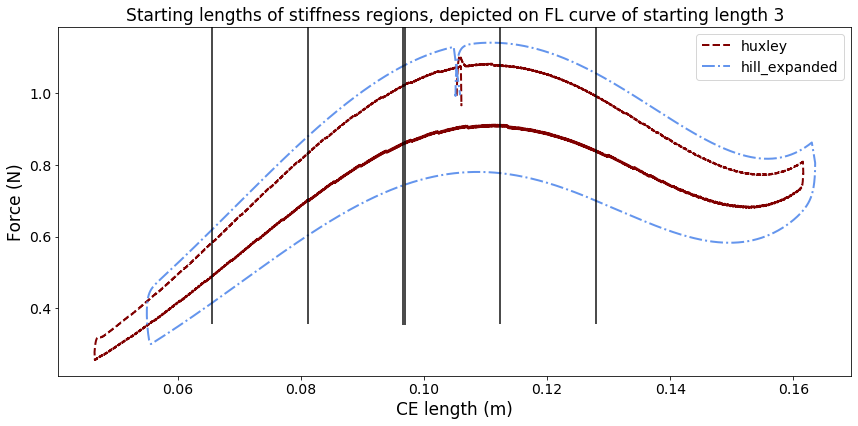

In [5]:
fig, axes = plt.subplots(1,1,figsize=(12,6))
sss = 1800
ttt=-1
axes.plot(states_hux[:,-2][sss:ttt],calculated_muscle_forces[:,2][sss:ttt],label='huxley',color='maroon',linewidth=2,linestyle='--')
axes.plot(states_FVhill[:,0][sss:ttt],calculated_hill_forces_FVhill[sss:ttt],label='hill_expanded',color='cornflowerblue',linewidth=2,linestyle='dashdot')
#axes.plot(l_mtc[framemax_variable1:framemax_variable],calculated_hill_forces[framemax_variable1:framemax_variable],label='hill_simple',color='indigo',linewidth=2,linestyle='dotted')
axes.set_title('Starting lengths of stiffness regions, depicted on FL curve of starting length 3',fontsize=17)
axes.set_ylabel('Force (N)',fontsize=17)
axes.set_xlabel('CE length (m)',fontsize=17)
axes.legend(fontsize=14)
#axes[3].grid()
#for i in [0.050484,0.034922,0.01936,0.003799,-0.011764,-0.027326]:#,-0.042888
for i in [0.043910,0.028349,0.012787,-0.002775,-0.018337]:#,-0.042888
    b=2
    if i == 0.012787:
        b=4
    axes.axvline(0.09677328-i+0.012787,ymin=0.15,ymax=1,color='black', alpha=0.7,linewidth=b)
axes.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout(pad=1.0)
fig.savefig('Results/1a3_zoomedFL.png')       

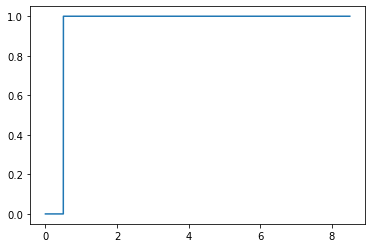

In [6]:
plt.plot(time_vector,stimhux)

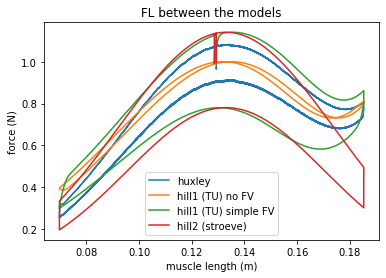

In [7]:
framemax_variable1 = 1800

plt.plot(l_mtc[framemax_variable1:framemax_variable],calculated_muscle_forces[:,2][framemax_variable1:framemax_variable],label='huxley')
plt.plot(l_mtc[framemax_variable1:framemax_variable],calculated_hill_forces_FV0[framemax_variable1:framemax_variable],label='hill1 (TU) no FV')


plt.plot(l_mtc[framemax_variable1:framemax_variable],calculated_hill_forces_FVhill[framemax_variable1:framemax_variable],label='hill1 (TU) simple FV')
plt.plot(l_mtc[framemax_variable1:framemax_variable],calculated_hill_forces[framemax_variable1:framemax_variable],label='hill2 (stroeve)')
plt.title('FL between the models')
plt.xlabel('muscle length (m)')
plt.ylabel('force (N)')
plt.legend()
plt.savefig('Results/'+save_name+'FL_all_EXP1.png')
#plt.savefig('Results/FL_all_'+time.ctime()+'_.png')

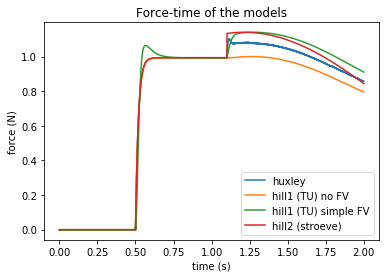

In [8]:
framemax_variable = 5000
plt.plot(time_vector[1:framemax_variable],calculated_muscle_forces[:,2][1:framemax_variable],label='huxley')
plt.plot(time_vector[1:framemax_variable],calculated_hill_forces_FV0[1:framemax_variable],label='hill1 (TU) no FV')
plt.plot(time_vector[1:framemax_variable],calculated_hill_forces_FVhill[1:framemax_variable],label='hill1 (TU) simple FV')

plt.plot(time_vector[1:framemax_variable],calculated_hill_forces[1:framemax_variable],label='hill2 (stroeve)')
plt.title('Force-time of the models')
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend()
plt.savefig('Results/'+save_name+'Ft_all_EXP1.png')
#plt.savefig('Results/Ft_all_'+time.ctime()+'_.png')

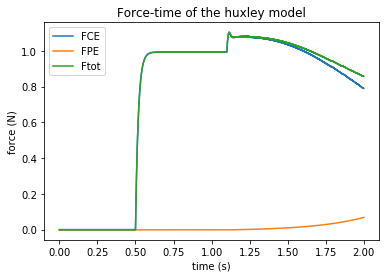

In [9]:
plt.plot(time_vector[1:framemax_variable],calculated_muscle_forces[:,0][1:framemax_variable],label='FCE')
plt.plot(time_vector[1:framemax_variable],calculated_muscle_forces[:,2][1:framemax_variable]-calculated_muscle_forces[:,0][1:framemax_variable],label='FPE')
plt.plot(time_vector[1:framemax_variable],calculated_muscle_forces[:,2][1:framemax_variable],label='Ftot')
plt.title('Force-time of the huxley model')
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend()
plt.savefig('Results/'+save_name+'Ft_hux_EXP1.png')

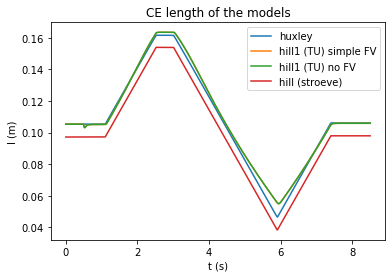

In [20]:
#plt.plot(time_vector[1:],l_mtc[1:])

plt.plot(time_vector[1:],states_hux[1:,-2],label='huxley')
plt.plot(time_vector[1:],states_FVhill[1:,0],label='hill1 (TU) simple FV')
plt.plot(time_vector[1:],states_FV0[1:,0],label='hill1 (TU) no FV')

plt.plot(time_vector,l_mtc-0.2*1.22*l_mtc0,label='hill (stroeve)')
plt.title('CE length of the models')
plt.ylabel('l (m)')
plt.xlabel('t (s)')
plt.legend()

plt.savefig('Results/LCEt_all_EXP1.png')

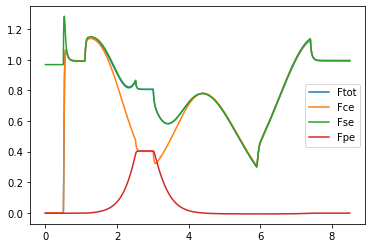

In [21]:
for i in range(4):
    plt.plot(time_vector[1:],force_vector_FVhill[1:,i])
plt.legend(['Ftot','Fce','Fse','Fpe'])

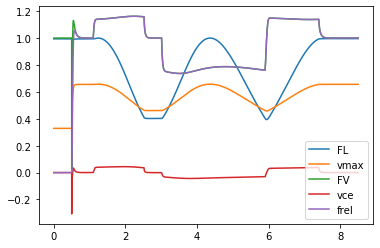

In [22]:
for i in range(5):
    plt.plot(time_vector[1:],force_vector_FVhill[1:,4+i])
plt.legend(['FL','vmax','FV','vce','frel'] )